<a href="https://colab.research.google.com/github/riye-das/House_price_predication/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
!pip install category_encoders
!pip install catboost
from catboost import CatBoostRegressor
import pylab
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import category_encoders
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.6 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv('/content/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
data1 = pd.read_csv('/content/housing.csv')

In [ ]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
151388,2023-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,64 years 03 months,790000.0
151389,2023-04,YISHUN,EXECUTIVE,258,YISHUN ST 22,01 TO 03,154.0,Maisonette,1985,61 years 02 months,808000.0
151390,2023-04,YISHUN,EXECUTIVE,293,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,68 years 04 months,892000.0
151391,2023-04,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,142.0,Apartment,1986,62 years 02 months,780000.0


In [ ]:
data1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151393 entries, 0 to 151392
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                151393 non-null  object 
 1   town                 151393 non-null  object 
 2   flat_type            151393 non-null  object 
 3   block                151393 non-null  object 
 4   street_name          151393 non-null  object 
 5   storey_range         151393 non-null  object 
 6   floor_area_sqm       151393 non-null  float64
 7   flat_model           151393 non-null  object 
 8   lease_commence_date  151393 non-null  int64  
 9   remaining_lease      151393 non-null  object 
 10  resale_price         151393 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 12.7+ MB


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [ ]:
data1.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,151393.000000,151393.000000,1.513930e+05
mean,97.535695,1995.584763,4.809510e+05
std,24.072054,13.775873,1.664162e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.600000e+05
50%,94.000000,1996.000000,4.500000e+05
75%,113.000000,2008.000000,5.700000e+05
max,249.000000,2019.000000,1.418000e+06


In [ ]:
data1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
Z = data1.drop(['median_house_value'], axis=1)
w = data1['median_house_value']
Z_train, Z_test, w_train, w_test = train_test_split(Z,w,test_size=0.2,random_state=42)
train_data1 = Z_train.join(w_train)
train_data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,96500.0
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,283500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

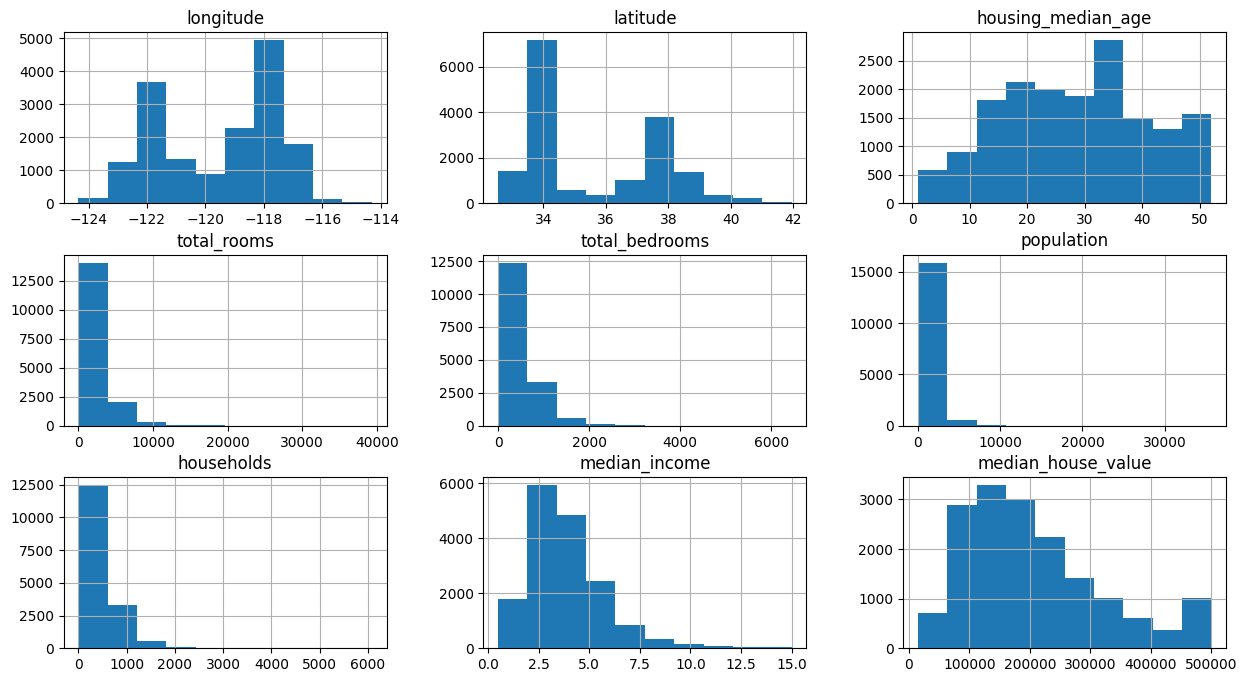

In [ ]:

train_data1.hist(figsize=(15,8))

<ipython-input-30-583eb383469b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data1.corr(), annot=True, cmap="YlGnBu")


<Axes: >

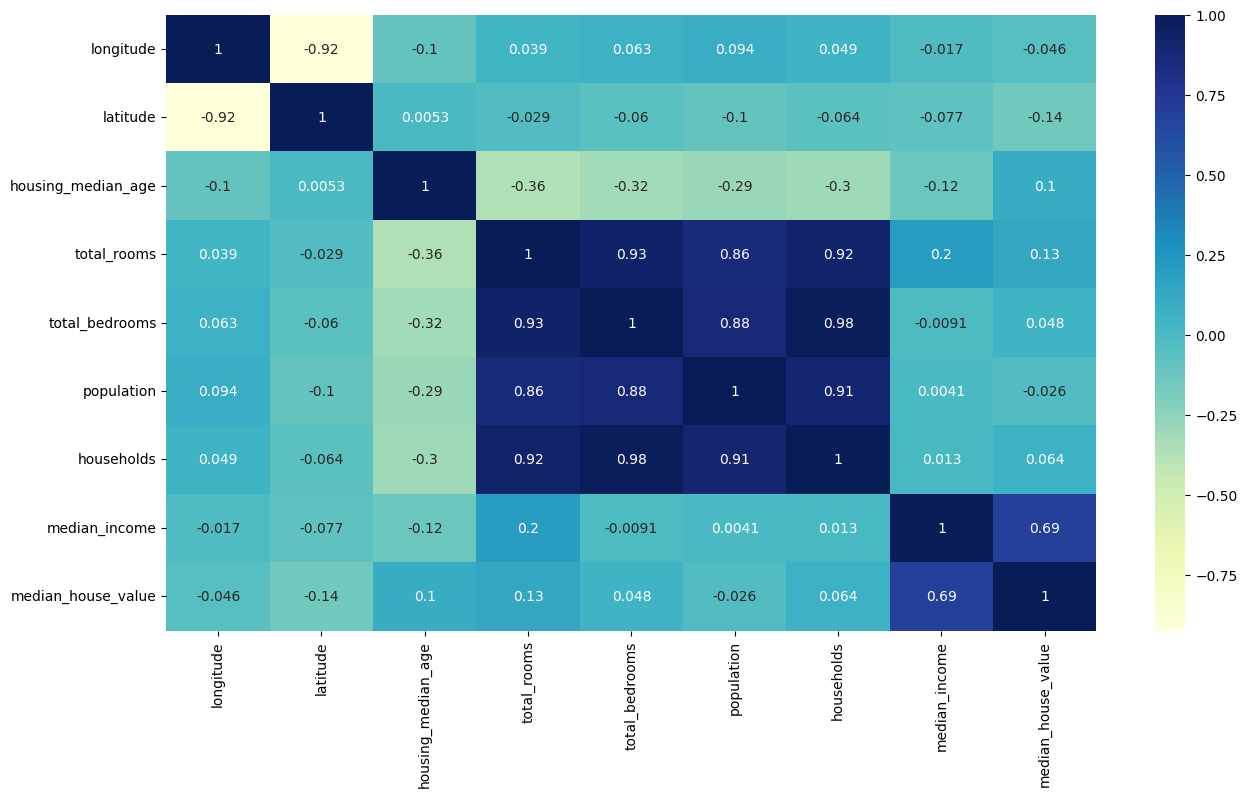

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data1.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

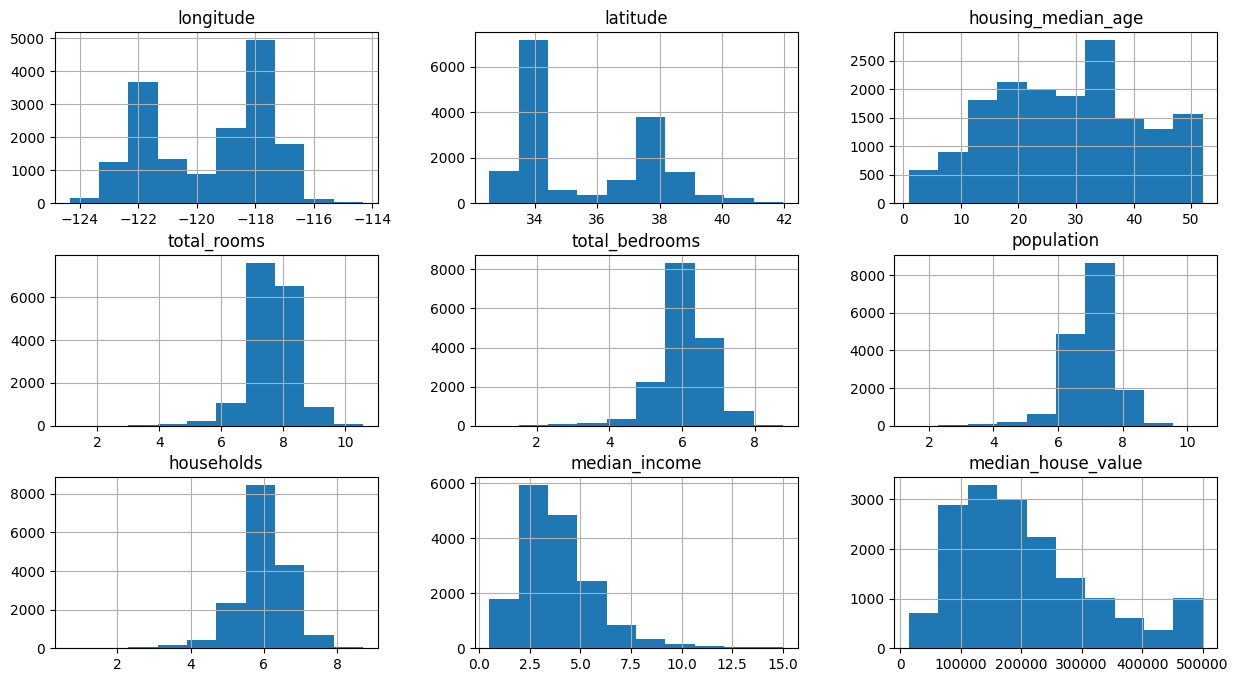

In [ ]:
train_data1['population']=np.log(train_data1['population']+1)
train_data1['total_rooms']=np.log(train_data1['total_rooms']+1)
train_data1['total_bedrooms']=np.log(train_data1['total_bedrooms']+1)
train_data1['households']=np.log(train_data1['households']+1)
train_data1.hist(figsize=(15,8))

In [ ]:
train_data1 = train_data1.join(pd.get_dummies(train_data1.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,8.047829,6.442540,7.741099,6.436150,3.2596,103000.0,0,0,0,0,1
8267,-118.16,33.77,49.0,8.126518,6.669498,7.181592,6.629363,3.8125,382100.0,0,0,0,0,1
17445,-120.48,34.66,4.0,7.548556,5.805135,6.820016,5.820083,4.1563,172600.0,0,0,0,0,1
14265,-117.11,32.69,36.0,7.259820,5.908083,7.257708,5.874931,1.9425,93400.0,0,0,0,0,1
2271,-119.80,36.78,43.0,7.776115,6.068426,6.774224,5.942799,3.5542,96500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,229200.0,1,0,0,0,0
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,97800.0,0,1,0,0,0
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,222100.0,1,0,0,0,0
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,283500.0,1,0,0,0,0


<Axes: >

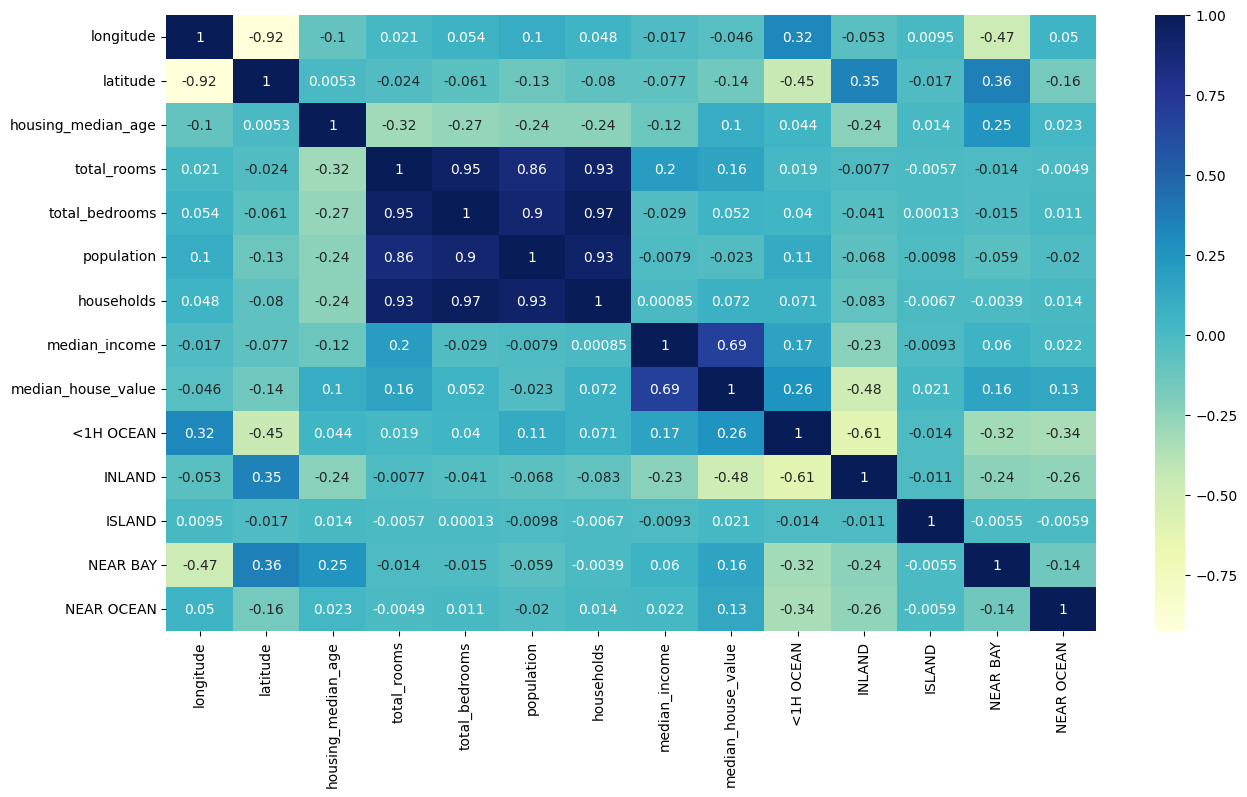

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data1.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

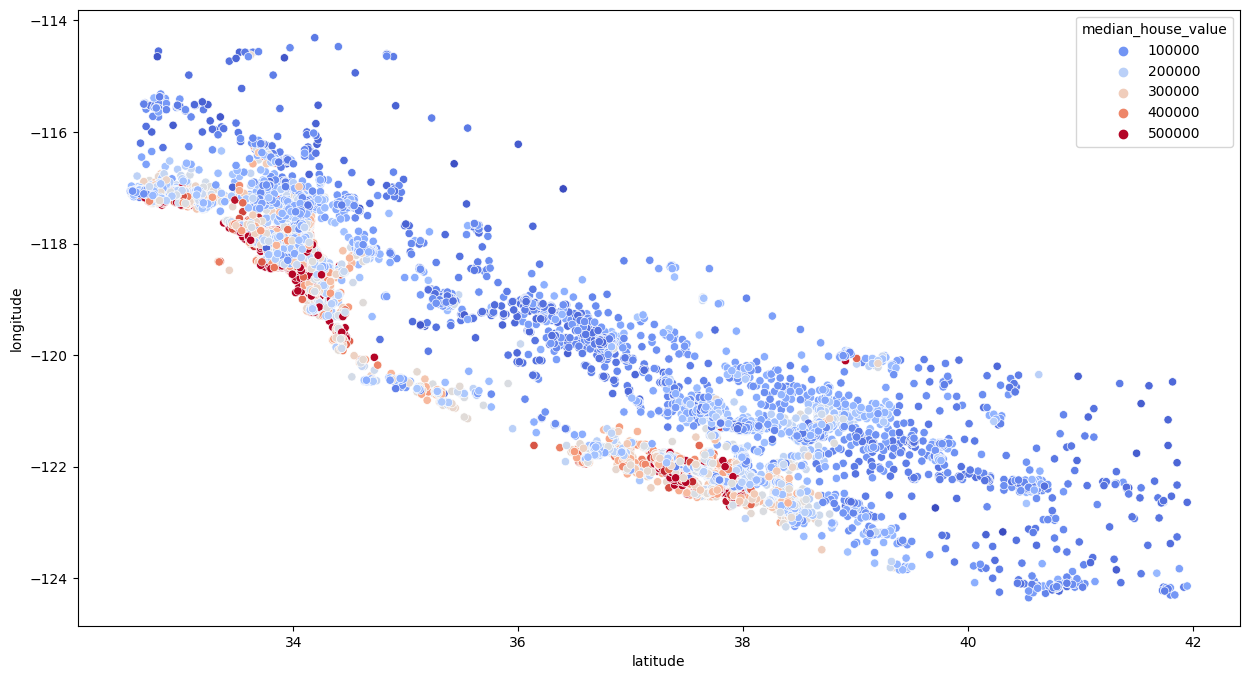

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data1, hue="median_house_value", palette="coolwarm")

In [ ]:

# Define input (square_feet, flat_type, flat_model, town) and target (resale_price) variables
X = data.drop(['resale_price'], axis=1)
y = data['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = X_train.join(y_train)
train_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
2168,2017-02,WOODLANDS,5 ROOM,580,WOODLANDS DR 16,04 TO 06,110.0,Improved,2001,83 years 02 months,418000.0
35759,2018-09,JURONG WEST,EXECUTIVE,410,JURONG WEST ST 42,04 TO 06,150.0,Maisonette,1985,65 years 11 months,515000.0
147513,2023-02,WOODLANDS,3 ROOM,310,WOODLANDS ST 31,10 TO 12,73.0,Model A,1993,69 years 08 months,375000.0
81303,2020-10,JURONG EAST,5 ROOM,322,JURONG EAST ST 31,10 TO 12,123.0,Improved,1985,63 years 11 months,458000.0
32971,2018-08,BISHAN,5 ROOM,226,BISHAN ST 23,04 TO 06,135.0,Model A,1992,72 years 09 months,780000.0
...,...,...,...,...,...,...,...,...,...,...,...
119879,2022-02,JURONG WEST,3 ROOM,480,JURONG WEST ST 41,04 TO 06,82.0,New Generation,1985,62 years 11 months,380000.0
103694,2021-05,PUNGGOL,4 ROOM,120A,EDGEDALE PLAINS,13 TO 15,93.0,Model A,2017,95 years 01 month,480000.0
131932,2022-07,WOODLANDS,4 ROOM,651,WOODLANDS RING RD,04 TO 06,101.0,Model A,1998,74 years 11 months,470000.0
146867,2023-02,PASIR RIS,5 ROOM,104,PASIR RIS ST 12,10 TO 12,122.0,Improved,1989,65 years 02 months,688000.0


In [ ]:
Z = data1.drop(['median_house_value'], axis=1)
w = data1['median_house_value']
Z_train, Z_test, w_train, w_test = train_test_split(Z,w,test_size=0.2,random_state=42)
train_data1 = Z_train.join(w_train)
train_data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,96500.0
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,283500.0


In [ ]:
#CATBoost for 1st dataset
cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan'))
  , ('imputer', SimpleImputer(strategy='median'))
  , ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
      ('Cat', cat_pipe, X.columns[X.dtypes == 'object'])
    , ('Num', num_pipe, X.columns[X.dtypes != 'object'])
])

pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor)
      , ("model", GradientBoostingRegressor(verbose=0, criterion = 'squared_error', random_state=0))
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate r2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



R2 Score: 0.9033108369157947
Mean Squared Error (MSE): 2720591611.2431664
Root Mean Squared Error (RMSE): 52159.29074712545


In [ ]:
#CATBoost for 2nd dataset
cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan'))
  , ('imputer', SimpleImputer(strategy='median'))
  , ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
      ('Cat', cat_pipe, Z.columns[Z.dtypes == 'object'])
    , ('Num', num_pipe, Z.columns[Z.dtypes != 'object'])
])

pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor)
      , ("model", GradientBoostingRegressor(verbose=0, criterion = 'squared_error', random_state=0))
    ]
)

pipe.fit(Z_train, w_train)
w_pred = pipe.predict(Z_test)

# calculate r2 score
r2 = r2_score(w_test, w_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(w_test, w_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)





R2 Score: 0.7630165159342086
Mean Squared Error (MSE): 3105452852.146222
Root Mean Squared Error (RMSE): 55726.590171535005


In [ ]:
#XGBoost
cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('Cat', cat_pipe, X.columns[X.dtypes == 'object']),
    ('Num', num_pipe, X.columns[X.dtypes != 'object'])
])

xgb_model = XGBRegressor()

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
# calculate r2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)




R2 Score: 0.9525142001653101
Mean Squared Error (MSE): 1336131832.798266
Root Mean Squared Error (RMSE): 36553.13711295196


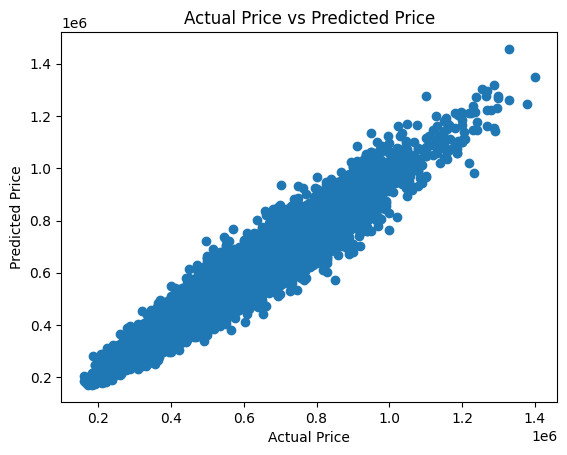

In [ ]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()


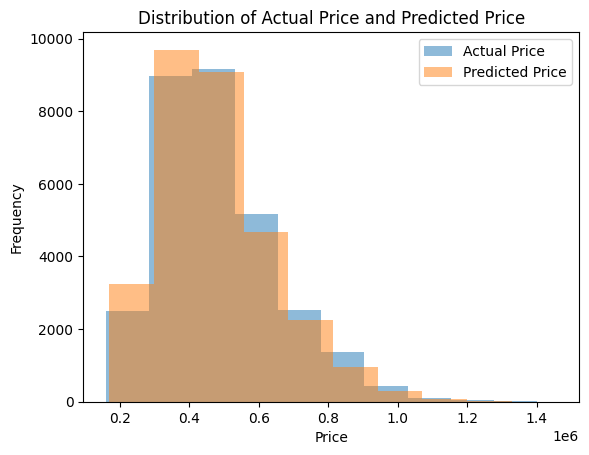

In [ ]:
plt.hist(y_test, bins=10, alpha=0.5, label='Actual Price')
plt.hist(y_pred, bins=10, alpha=0.5, label='Predicted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Price and Predicted Price')
plt.legend()
plt.show()

In [ ]:
#XGBoost for 2nd dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


cat_pipe = Pipeline([
('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan')),
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])

num_pipe = Pipeline([
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
('Cat', cat_pipe, Z.columns[Z.dtypes == 'object']),
('Num', num_pipe, Z.columns[Z.dtypes != 'object'])
])


xgb_model = XGBRegressor()


pipe = Pipeline([
('preprocessor', preprocessor),
('model', xgb_model)
])

pipe.fit(Z_train, w_train)

w_pred = pipe.predict(Z_test)

r2 = r2_score(w_test, w_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(w_test, w_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R2 Score: 0.8268384158722806
Mean Squared Error (MSE): 2269124945.2738047
Root Mean Squared Error (RMSE): 47635.332950172655


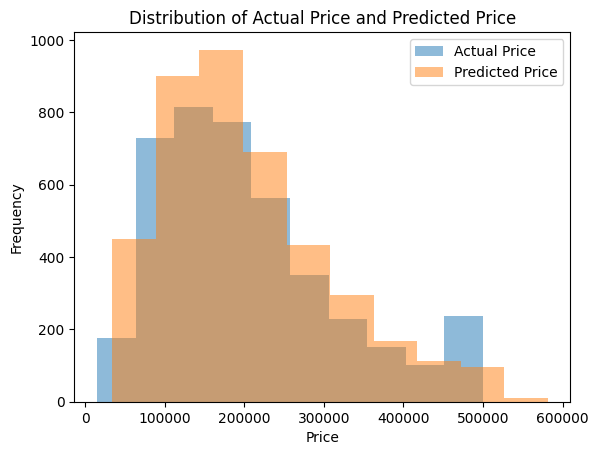

In [ ]:
plt.hist(w_test, bins=10, alpha=0.5, label='Actual Price')
plt.hist(w_pred, bins=10, alpha=0.5, label='Predicted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Price and Predicted Price')
plt.legend()
plt.show()

In [ ]:
#Random Forest for first dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('Cat', cat_pipe, X.columns[X.dtypes == 'object']),
    ('Num', num_pipe, X.columns[X.dtypes != 'object'])
])

rf_model = RandomForestRegressor()

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


# calculate r2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)





R2 Score: 0.9581991268217663
Mean Squared Error (MSE): 1176172192.2476666
Root Mean Squared Error (RMSE): 34295.36692102399


In [ ]:
#Random Forest for 2nd dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('Cat', cat_pipe, Z.columns[Z.dtypes == 'object']),
    ('Num', num_pipe, Z.columns[Z.dtypes != 'object'])
])

rf_model = RandomForestRegressor()

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

pipe.fit(Z_train, w_train)

w_pred = pipe.predict(Z_test)

r2 = r2_score(w_test, w_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(w_test, w_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



R2 Score: 0.81544484393893
Mean Squared Error (MSE): 2418427334.8307652
Root Mean Squared Error (RMSE): 49177.50842438813


In [ ]:
#Decision tree

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the categorical pipeline
cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer([
    ('Cat', cat_pipe, X.columns[X.dtypes == 'object']),
    ('Num', num_pipe, X.columns[X.dtypes != 'object'])
])

# Create the pipeline with a decision tree regressor
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", DecisionTreeRegressor(random_state=0))
    ]
)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate r2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R2 Score: 0.908329719682462
Mean Squared Error (MSE): 2579372782.604465
Root Mean Squared Error (RMSE): 50787.52585630122


In [ ]:
#linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('Cat', cat_pipe, X.columns[X.dtypes == 'object']),
    ('Num', num_pipe, X.columns[X.dtypes != 'object'])
])

lr_model = LinearRegression()

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lr_model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

# calculate r2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R2 Score: 0.8309521406574744
Mean Squared Error (MSE): 4756584640.466485
Root Mean Squared Error (RMSE): 68967.99721948206


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('Cat', cat_pipe, Z.columns[Z.dtypes == 'object']),
    ('Num', num_pipe, Z.columns[Z.dtypes != 'object'])
])

dt_model = DecisionTreeRegressor()

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', dt_model)
])

pipe.fit(Z_train, w_train)

w_pred = pipe.predict(Z_test)

r2 = r2_score(w_test, w_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(w_test, w_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R2 Score: 0.6387151523955656
Mean Squared Error (MSE): 4734309080.032461
Root Mean Squared Error (RMSE): 68806.31569872392


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cat_pipe = Pipeline([
    ('CBEncoder', category_encoders.CatBoostEncoder(handle_missing='return_nan')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('Cat', cat_pipe, Z.columns[Z.dtypes == 'object']),
    ('Num', num_pipe, Z.columns[Z.dtypes != 'object'])
])

lr_model = LinearRegression()

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lr_model)
])

pipe.fit(Z_train, w_train)

w_pred = pipe.predict(Z_test)

r2 = r2_score(w_test, w_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(w_test, w_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R2 Score: 0.6246425953857305
Mean Squared Error (MSE): 4918717130.557409
Root Mean Squared Error (RMSE): 70133.5663613181
